In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pydataset import data
import scipy.stats as stats
import acquire
import prepare
import explore

# DATA AQUISITION EXERCISES

### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = sns.load_dataset('iris')

#### print the first 3 rows

In [3]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


#### print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

#### print the column names

In [5]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### print the data type of each column

In [6]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

#### print the summary statistics for each of the numeric variables

In [7]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### 5. Read the data from this google sheet into a dataframe, df_google.

In [8]:
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

#### print the first 3 rows

In [9]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### print the number of rows and columns

In [10]:
df_google.shape

(891, 12)

#### print the column names

In [11]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### print the data type of each column

In [12]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### print the summary statistics for each of the numeric variables

In [13]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### print the unique values for each of your categorical variables

In [14]:
df_google[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].apply(lambda col: col.unique())

Survived                   [0, 1]
Pclass                  [3, 1, 2]
Sex                [male, female]
SibSp       [1, 0, 3, 4, 2, 5, 8]
Parch       [0, 1, 2, 5, 3, 4, 6]
Embarked           [S, C, Q, nan]
dtype: object

In [15]:
# Another way for count of unique categories only:
for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [16]:
# Another note from review - get value counts from each of columns with small number of options:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [17]:
df_excel = pd.read_excel('Excel_Exercises.xlsx')

#### assign the first 100 rows to a new dataframe, df_excel_sample

In [18]:
df_excel_sample = df_excel.head(100)

#### print the number of rows of your original dataframe

In [19]:
df_excel.shape[0]

7049

#### print the first 5 column names

In [20]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

#### print the column names that have a data type of object

In [21]:
df_excel.select_dtypes(include=['object'])

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes
...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,Mailed check,No
7045,9992-RRAMN,Male,Yes,No,Electronic check,Yes
7046,9992-UJOEL,Male,No,No,Mailed check,No
7047,9993-LHIEB,Male,Yes,Yes,Mailed check,No


#### compute the range for each of the numeric variables.

In [22]:
ndf = df_excel.describe().T
ndf['range'] = ndf['max'] - ndf['min']
ndf[['range']]

,range
is_senior_citizen,1.0
phone_service,2.0
internet_service,2.0
contract_type,2.0
monthly_charges,100.5
total_charges,8666.0


# DATA PREPARATION EXERCISES

### 1. Use the function defined in acquire.py to load the iris data.

In [23]:
iris = acquire.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


#### Drop the species_id and measurement_id columns.

In [24]:
iris = iris.drop(columns=['species_id', 'measurement_id'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Rename the species_name column to just species.

In [25]:
iris = iris.rename(columns={'species_name':'species'})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [26]:
dummies = pd.get_dummies(iris.species)
iris = pd.concat([iris, dummies], axis=1)
iris = iris.drop(columns='species')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


#### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [27]:
def prep_iris(df):
    df = df.drop(columns=['species_id', 'measurement_id'])
    df = df.rename(columns={'species_name':'species'})
    dummies = pd.get_dummies(df.species)
    df = pd.concat([iris, dummies], axis=1)
    df = iris.drop(columns='species')
    return df


### 2. Use the function defined in acquire.py to load the Titanic data.

In [28]:
t = acquire.get_titanic_data()
t.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


#### Drop any unnecessary, unhelpful, or duplicated columns.

In [29]:
t = t.drop(columns='embarked')
t = t.drop(columns='class')
t = t.drop(columns=['age','deck'])

#### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [30]:
dummy = pd.get_dummies(t[['sex', 'embark_town']], drop_first=True)
t = pd.concat([t, dummy], axis=1)
t = t.drop(columns=['sex','embark_town'])

#### Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [31]:
def prep_titanic(df):
    df = df.drop(columns=['age','deck','embarked','class'])
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    df = df.drop(columns=['sex','embark_town'])
    return df

### 3. Use the function defined in acquire.py to load the Telco data.

In [32]:
telco = acquire.get_telco_data()
telco.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [33]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [34]:
telco.total_charges = telco.total_charges.str.replace(' ','0')
#telco.total_charges[telco.total_charges == ' ']
telco.total_charges = telco.total_charges.astype('float')

In [35]:
telco.total_charges

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

#### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [36]:
telco[['contract_type_id','contract_type']].value_counts(dropna=False)

contract_type_id  contract_type 
1                 Month-to-month    3875
3                 Two year          1695
2                 One year          1473
dtype: int64

In [37]:
telco = telco.drop(columns=['internet_service_type_id', 'payment_type_id', 'contract_type_id'])
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,Mailed check,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,Mailed check,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Mailed check,Fiber optic


#### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [38]:
dummies = pd.get_dummies(telco[['gender','partner', 'dependents', 'phone_service','paperless_billing', 'churn']], drop_first=True)
telco = pd.concat([telco, dummies], axis=1)
telco = telco.drop(columns=['gender', 'partner', 'dependents', 'phone_service','paperless_billing', 'churn'])
telco

,customer_id,senior_citizen,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,total_charges,contract_type,payment_type,internet_service_type,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,churn_Yes
0,0002-ORFBO,0,9,No,No,Yes,No,Yes,Yes,No,...,593.30,One year,Mailed check,DSL,0,1,1,1,1,0
1,0003-MKNFE,0,9,Yes,No,No,No,No,No,Yes,...,542.40,Month-to-month,Mailed check,DSL,1,0,0,1,0,0
2,0004-TLHLJ,0,4,No,No,No,Yes,No,No,No,...,280.85,Month-to-month,Electronic check,Fiber optic,1,0,0,1,1,1
3,0011-IGKFF,1,13,No,No,Yes,Yes,No,Yes,Yes,...,1237.85,Month-to-month,Electronic check,Fiber optic,1,1,0,1,1,1
4,0013-EXCHZ,1,3,No,No,No,No,Yes,Yes,No,...,267.40,Month-to-month,Mailed check,Fiber optic,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,13,No,Yes,No,No,Yes,No,No,...,742.90,One year,Mailed check,DSL,0,0,0,1,0,0
7039,9992-RRAMN,0,22,Yes,No,No,No,No,No,Yes,...,1873.70,Month-to-month,Electronic check,Fiber optic,1,1,0,1,1,1
7040,9992-UJOEL,0,2,No,No,Yes,No,No,No,No,...,92.75,Month-to-month,Mailed check,DSL,1,0,0,1,1,0
7041,9993-LHIEB,0,67,No,Yes,No,Yes,Yes,No,Yes,...,4627.65,Two year,Mailed check,DSL,1,1,1,1,0,0


In [39]:
dum = pd.get_dummies(telco.contract_type)
telco = pd.concat([telco, dum], axis=1)
telco = telco.drop(columns='contract_type')
telco.head()

,customer_id,senior_citizen,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,internet_service_type,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,churn_Yes,Month-to-month,One year,Two year
0,0002-ORFBO,0,9,No,No,Yes,No,Yes,Yes,No,...,DSL,0,1,1,1,1,0,0,1,0
1,0003-MKNFE,0,9,Yes,No,No,No,No,No,Yes,...,DSL,1,0,0,1,0,0,1,0,0
2,0004-TLHLJ,0,4,No,No,No,Yes,No,No,No,...,Fiber optic,1,0,0,1,1,1,1,0,0
3,0011-IGKFF,1,13,No,No,Yes,Yes,No,Yes,Yes,...,Fiber optic,1,1,0,1,1,1,1,0,0
4,0013-EXCHZ,1,3,No,No,No,No,Yes,Yes,No,...,Fiber optic,0,1,0,1,1,1,1,0,0


In [40]:
telco.multiple_lines = telco.multiple_lines.str.replace('No phone service', '0').str.replace('Yes', '2').str.replace('No', '1').astype('int')
telco.online_security = telco.online_security.str.replace('No internet service', '0').str.replace('Yes', '1').str.replace('No', '0').astype('int')
telco.online_backup = telco.online_backup.str.replace('No internet service', '0').str.replace('Yes', '1').str.replace('No', '0').astype('int')
telco.device_protection = telco.device_protection.str.replace('No internet service', '0').str.replace('Yes', '1').str.replace('No', '0').astype('int')
telco.tech_support = telco.tech_support.str.replace('No internet service', '0').str.replace('Yes', '1').str.replace('No', '0').astype('int')
telco.streaming_tv = telco.streaming_tv.str.replace('No internet service', '0').str.replace('Yes', '1').str.replace('No', '0').astype('int')
telco.streaming_movies = telco.streaming_movies.str.replace('No internet service', '0').str.replace('Yes', '2').str.replace('No', '0').astype('int')

In [41]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   tenure                 7043 non-null   int64  
 3   multiple_lines         7043 non-null   int64  
 4   online_security        7043 non-null   int64  
 5   online_backup          7043 non-null   int64  
 6   device_protection      7043 non-null   int64  
 7   tech_support           7043 non-null   int64  
 8   streaming_tv           7043 non-null   int64  
 9   streaming_movies       7043 non-null   int64  
 10  monthly_charges        7043 non-null   float64
 11  total_charges          7043 non-null   float64
 12  payment_type           7043 non-null   object 
 13  internet_service_type  7043 non-null   object 
 14  gender_Male            7043 non-null   uint8  
 15  part

In [42]:
dum = pd.get_dummies(telco.internet_service_type)
telco = pd.concat([telco, dum[['DSL', 'Fiber optic']]], axis=1)
telco.head()

,customer_id,senior_citizen,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,churn_Yes,Month-to-month,One year,Two year,DSL,Fiber optic
0,0002-ORFBO,0,9,1,0,1,0,1,1,0,...,1,1,1,1,0,0,1,0,1,0
1,0003-MKNFE,0,9,2,0,0,0,0,0,2,...,0,0,1,0,0,1,0,0,1,0
2,0004-TLHLJ,0,4,1,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,1
3,0011-IGKFF,1,13,1,0,1,1,0,1,2,...,1,0,1,1,1,1,0,0,0,1
4,0013-EXCHZ,1,3,1,0,0,0,1,1,0,...,1,0,1,1,1,1,0,0,0,1


In [43]:
dum = pd.get_dummies(telco.payment_type)
telco = pd.concat([telco, dum], axis=1)
telco.head()

,customer_id,senior_citizen,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,churn_Yes,Month-to-month,One year,Two year,DSL,Fiber optic,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0002-ORFBO,0,9,1,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
1,0003-MKNFE,0,9,2,0,0,0,0,0,2,...,0,1,0,0,1,0,0,0,0,1
2,0004-TLHLJ,0,4,1,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,13,1,0,1,1,0,1,2,...,1,1,0,0,0,1,0,0,1,0
4,0013-EXCHZ,1,3,1,0,0,0,1,1,0,...,1,1,0,0,0,1,0,0,0,1


In [44]:
telco = telco.drop(columns=(['payment_type', 'internet_service_type']))
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7043 non-null   object 
 1   senior_citizen             7043 non-null   int64  
 2   tenure                     7043 non-null   int64  
 3   multiple_lines             7043 non-null   int64  
 4   online_security            7043 non-null   int64  
 5   online_backup              7043 non-null   int64  
 6   device_protection          7043 non-null   int64  
 7   tech_support               7043 non-null   int64  
 8   streaming_tv               7043 non-null   int64  
 9   streaming_movies           7043 non-null   int64  
 10  monthly_charges            7043 non-null   float64
 11  total_charges              7043 non-null   float64
 12  gender_Male                7043 non-null   uint8  
 13  partner_Yes                7043 non-null   uint8

#### Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [45]:
def prep_telco(telco):
    '''
    This function accepts the telco DataFrame and preps it...
    '''
    # fix monthly charges from string to floats
    telco.total_charges = telco.total_charges.str.replace(' ','0')
    telco.total_charges = telco.total_charges.astype('float')
    
    # drop foreign key columns
    telco = telco.drop(columns=['internet_service_type_id', 'payment_type_id', 'contract_type_id'])
    
    # split out 0 vs 1 columns
    dummies = pd.get_dummies(telco[['gender','partner', 'dependents', 'phone_service','paperless_billing', 'churn']], drop_first=True)
    telco = pd.concat([telco, dummies], axis=1)
    telco = telco.drop(columns=['gender', 'partner', 'dependents', 'phone_service','paperless_billing', 'churn'])
    
    # split out category columns
    dum = pd.get_dummies(telco.contract_type)
    telco = pd.concat([telco, dum], axis=1)
    telco = telco.drop(columns='contract_type')
    dum = pd.get_dummies(telco.internet_service_type)
    telco = pd.concat([telco, dum[['DSL', 'Fiber optic']]], axis=1)
    dum = pd.get_dummies(telco.payment_type)
    telco = pd.concat([telco, dum], axis=1)
    telco = telco.drop(columns=(['payment_type', 'internet_service_type']))
    
    # relabel final columns with 0 or 1 values
    telco.multiple_lines = telco.multiple_lines.str.replace('No phone service', '0').str.replace('Yes', '2').str.replace('No', '1').astype('int')
    telco.online_security = telco.online_security.str.replace('No internet service', '0').str.replace('Yes', '1').str.replace('No', '0').astype('int')
    telco.online_backup = telco.online_backup.str.replace('No internet service', '0').str.replace('Yes', '1').str.replace('No', '0').astype('int')
    telco.device_protection = telco.device_protection.str.replace('No internet service', '0').str.replace('Yes', '1').str.replace('No', '0').astype('int')
    telco.tech_support = telco.tech_support.str.replace('No internet service', '0').str.replace('Yes', '1').str.replace('No', '0').astype('int')
    telco.streaming_tv = telco.streaming_tv.str.replace('No internet service', '0').str.replace('Yes', '1').str.replace('No', '0').astype('int')
    telco.streaming_movies = telco.streaming_movies.str.replace('No internet service', '0').str.replace('Yes', '2').str.replace('No', '0').astype('int')
  
    return telco

In [46]:
tel2 = acquire.get_telco_data()
tel2 = prep_telco(tel2)
tel2

,customer_id,senior_citizen,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,churn_Yes,Month-to-month,One year,Two year,DSL,Fiber optic,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0002-ORFBO,0,9,1,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
1,0003-MKNFE,0,9,2,0,0,0,0,0,2,...,0,1,0,0,1,0,0,0,0,1
2,0004-TLHLJ,0,4,1,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,13,1,0,1,1,0,1,2,...,1,1,0,0,0,1,0,0,1,0
4,0013-EXCHZ,1,3,1,0,0,0,1,1,0,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,13,1,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
7039,9992-RRAMN,0,22,2,0,0,0,0,0,2,...,1,1,0,0,0,1,0,0,1,0
7040,9992-UJOEL,0,2,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
7041,9993-LHIEB,0,67,1,1,0,1,1,0,2,...,0,0,0,1,1,0,0,0,0,1


In [47]:
df = acquire.get_telco_data()
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


### EXTRA from slack

#### 1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [48]:
def split_data(df, target):
    '''
    Takes in a dataframe and target column (as a string) and returns train, validate, 
    and test subset dataframes with the .2/.8 and .25/.75 splits to create a final
    .2/.2/.6 split between datasets
    '''
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, test_size = .25, random_state=123, stratify=train[target])
    
    return train, validate, test

#### 2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [49]:
df = acquire.get_iris_data()
df = prepare.prep_iris(df)

In [50]:
train_iris, validate_iris, test_iris = prepare.split_data(df, 'species')

In [51]:
train_iris = train_iris.drop(columns='species')
validate_iris = validate_iris.drop(columns='species')
test_iris = test_iris.drop(columns='species')

In [52]:
train_iris.shape, validate_iris.shape, test_iris.shape

((90, 7), (30, 7), (30, 7))

#### 3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [53]:
df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)

In [54]:
train_titanic, validate_titanic, test_titanic = prepare.split_data(df, 'survived')

In [55]:
train_titanic.shape, validate_titanic.shape, test_titanic.shape

((534, 10), (178, 10), (179, 10))

#### 4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [56]:
df = acquire.get_telco_data()
df = prepare.prep_telco(df)

In [57]:
train_telco, validate_telco, test_telco = prepare.split_data(df, 'churn_Yes')

In [58]:
train_telco.shape, validate_telco.shape, test_telco.shape

((4225, 27), (1409, 27), (1409, 27))

# EXPLORATORY ANALYSIS EXERCISES

## Part I

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

#### 1. Acquire, prepare & split your data.

In [59]:
iris = acquire.get_iris_data()
iris = prepare.prep_iris(iris)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [60]:
train, val, test = prepare.split_data(iris, 'species')
# train = train.drop(columns='species')
# val = val.drop(columns='species')
# test = test.drop(columns='species')
train.shape, val.shape, test.shape

((90, 8), (30, 8), (30, 8))

In [61]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
70,5.9,3.2,4.8,1.8,versicolor,0,1,0
123,6.3,2.7,4.9,1.8,virginica,0,0,1
87,6.3,2.3,4.4,1.3,versicolor,0,1,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
15,5.7,4.4,1.5,0.4,setosa,1,0,0


In [62]:
cats = ['species']
nums = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#### 2. Univariate Stats

##### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

sepal_length


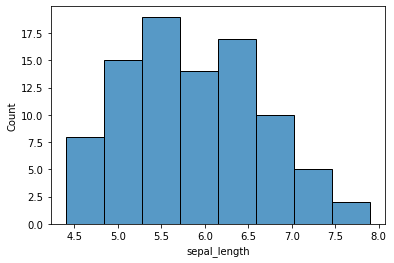

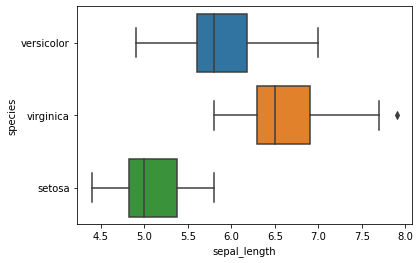

count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64
-----------------------------------------
sepal_width


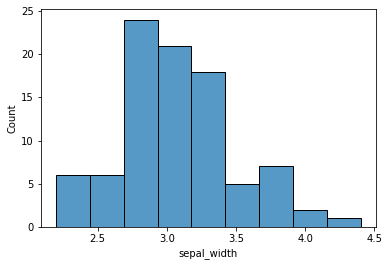

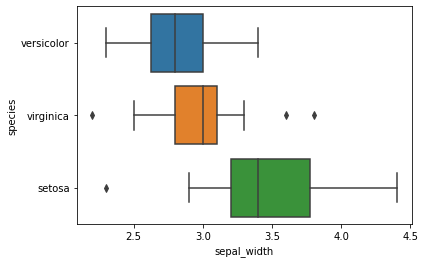

count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64
-----------------------------------------
petal_length


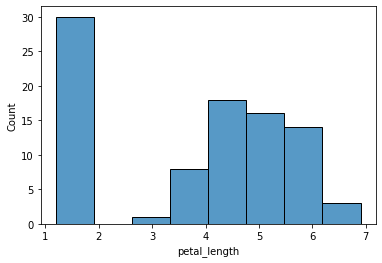

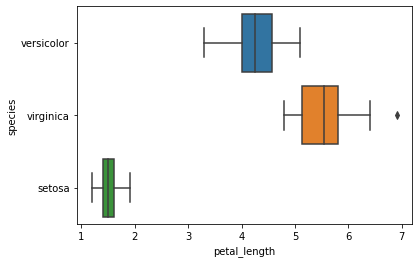

count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
-----------------------------------------
petal_width


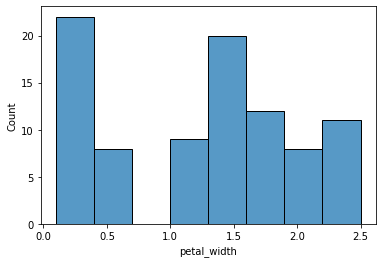

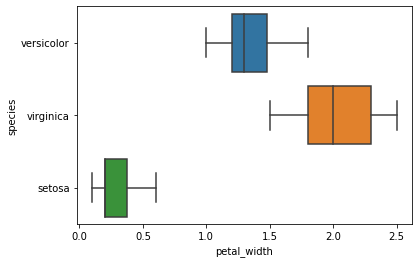

count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64
-----------------------------------------


In [63]:
for col in nums:
    print(col)
    sns.histplot(data=train, x=col)
    plt.show()
    sns.boxplot(data=train, x=col, y='species')
    plt.show()
    print(train[col].describe())
    print('-----------------------------------------')

##### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

species
versicolor    30
virginica     30
setosa        30
Name: species, dtype: int64
versicolor    33.333333
virginica     33.333333
setosa        33.333333
Name: species, dtype: float64


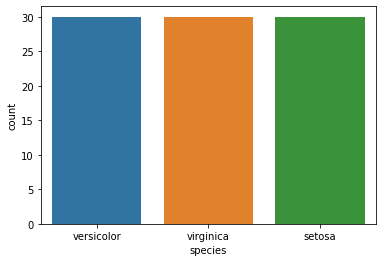

In [64]:
for col in cats:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

##### Document takeaways & any actions.

In [65]:
# sepal dimensions are less distinct than petal dimensions between species
# petal length seems to have the most separation between species
# There are an even number of each species in the train set

#### 3. Bivariate Stats

##### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

sepal_length


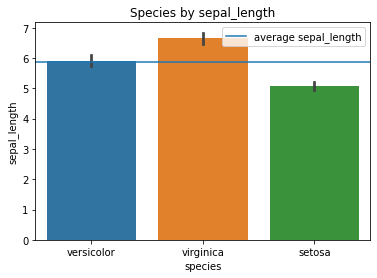

sepal_width


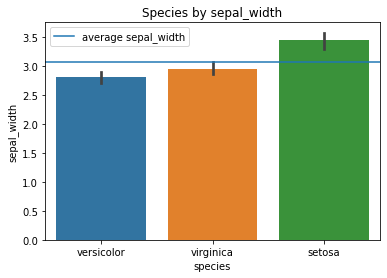

petal_length


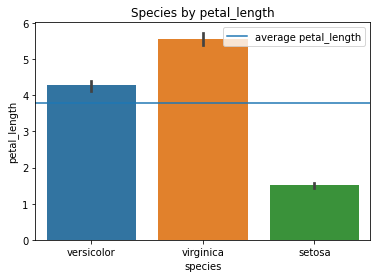

petal_width


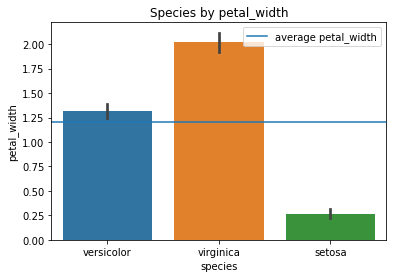

In [66]:
for col in nums:
    print(col)
    sns.barplot(data=train, x='species', y=col)
    rate = train[col].mean()
    plt.axhline(rate, label='average '+col)
    plt.title('Species by '+col)
    plt.legend()
    plt.show()

##### For each measurement type, compute the descriptive statistics for each species.

In [67]:
for col in nums:
    print('Versicolor '+col)
    print(train[train.species == 'versicolor'][col].describe())
    print('Virginica '+col)
    print(train[train.species == 'virginica'][col].describe())
    print('Setosa '+col)
    print(train[train.species == 'setosa'][col].describe())
    print('---------------------------------------------------------')

Versicolor sepal_length
count    30.00000
mean      5.91000
std       0.47659
min       4.90000
25%       5.60000
50%       5.80000
75%       6.17500
max       7.00000
Name: sepal_length, dtype: float64
Virginica sepal_length
count    30.000000
mean      6.646667
std       0.533520
min       5.800000
25%       6.300000
50%       6.500000
75%       6.900000
max       7.900000
Name: sepal_length, dtype: float64
Setosa sepal_length
count    30.000000
mean      5.070000
std       0.356371
min       4.400000
25%       4.825000
50%       5.000000
75%       5.375000
max       5.800000
Name: sepal_length, dtype: float64
---------------------------------------------------------
Versicolor sepal_width
count    30.000000
mean      2.806667
std       0.281539
min       2.300000
25%       2.625000
50%       2.800000
75%       3.000000
max       3.400000
Name: sepal_width, dtype: float64
Virginica sepal_width
count    30.000000
mean      2.956667
std       0.309263
min       2.200000
25%       2.800

In [68]:
# virginica typically has the largest dimensions (except sepal width)
# setosa typically has the smallest dimensions (except sepal width)

##### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [69]:
stats.mannwhitneyu(x=train[train.species == 'virginica'].petal_width, 
                   y=train[train.species == 'versicolor'].petal_width)

MannwhitneyuResult(statistic=883.0, pvalue=1.274471779403707e-10)

In [70]:
stats.mannwhitneyu(x=train[train.species == 'virginica'].petal_length, 
                   y=train[train.species == 'versicolor'].petal_length)

MannwhitneyuResult(statistic=892.5, pvalue=6.02995793051305e-11)

In [71]:
stats.mannwhitneyu(x=train[train.species == 'virginica'].sepal_width, 
                   y=train[train.species == 'versicolor'].petal_width)

MannwhitneyuResult(statistic=900.0, pvalue=2.4998175298546228e-11)

In [72]:
stats.mannwhitneyu(x=train[train.species == 'virginica'].sepal_length, 
                   y=train[train.species == 'versicolor'].petal_width)

MannwhitneyuResult(statistic=900.0, pvalue=2.57245717144811e-11)

##### Document takeaways & any actions.

In [73]:
# there are significant difference in all 4 dimentions between virginica and versicolor species

#### 4. Multivariate Stats

In [74]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
70,5.9,3.2,4.8,1.8,versicolor,0,1,0
123,6.3,2.7,4.9,1.8,virginica,0,0,1
87,6.3,2.3,4.4,1.3,versicolor,0,1,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
15,5.7,4.4,1.5,0.4,setosa,1,0,0


##### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

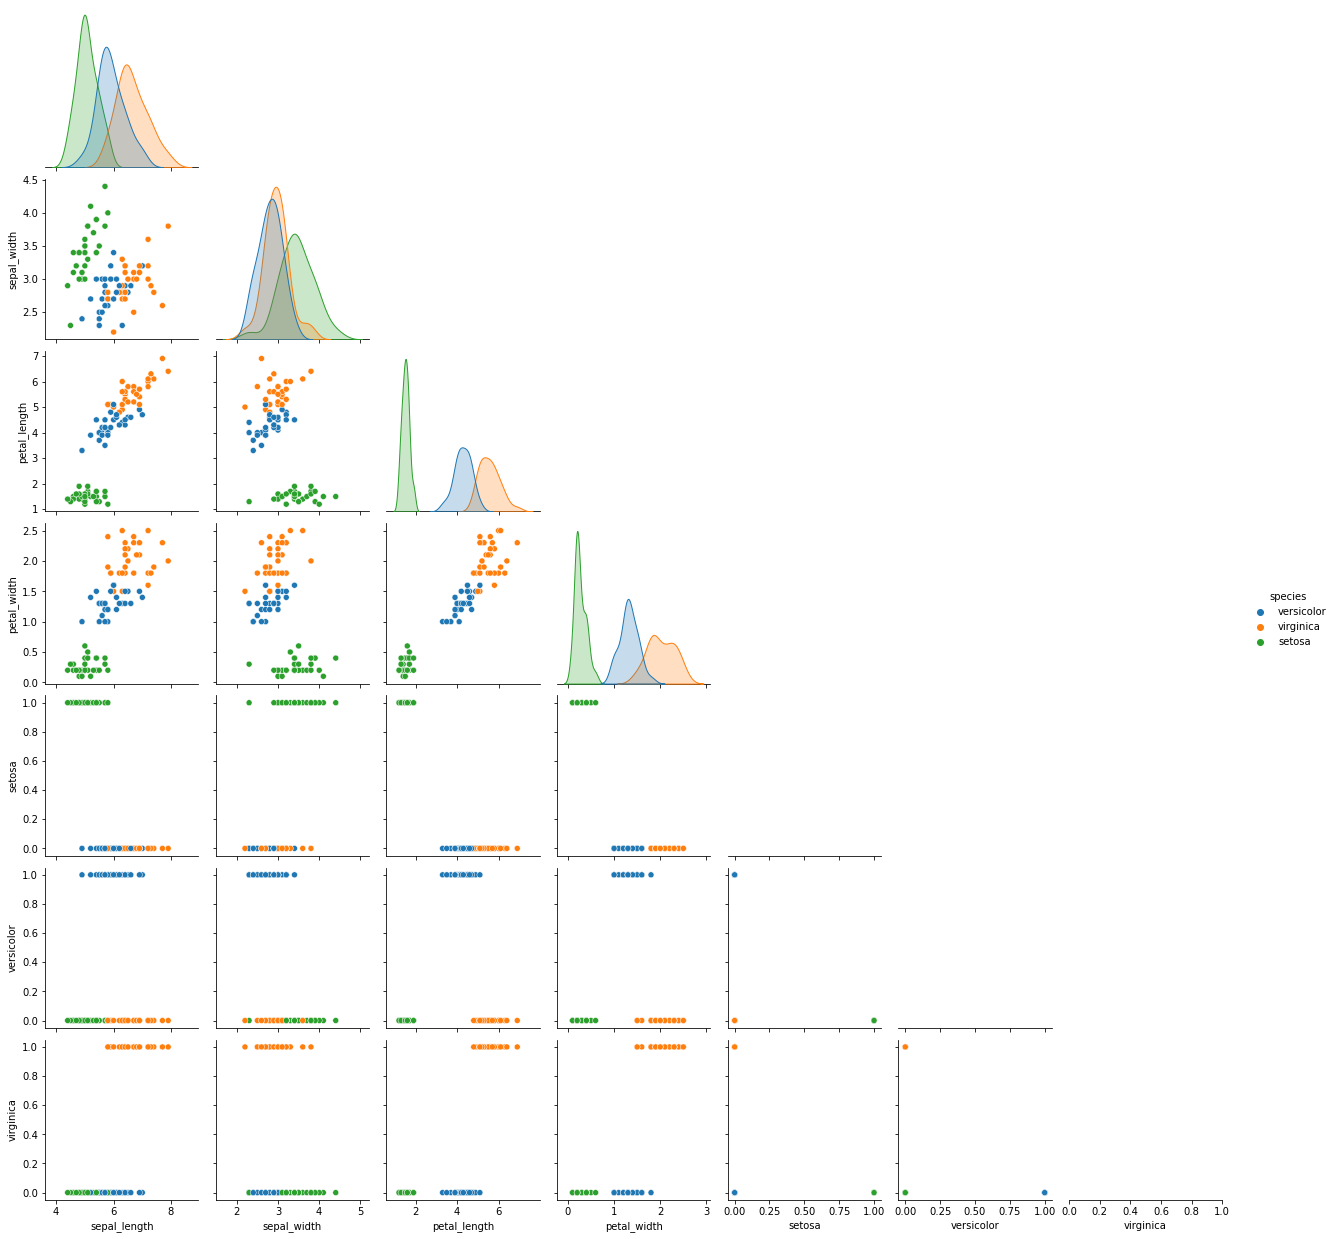

In [75]:
sns.pairplot(data=train, hue='species', corner=True)

##### Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

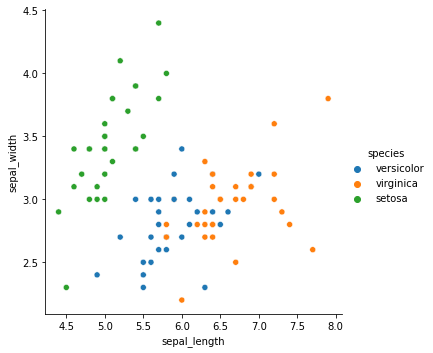

In [76]:
sns.relplot(data=train, x='sepal_length', y='sepal_width', hue='species')

##### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [77]:
temp = train.drop(columns=['virginica','setosa','versicolor'])

In [78]:
temp = temp.melt(id_vars='species')
temp

,species,variable,value
0,versicolor,sepal_length,5.9
1,virginica,sepal_length,6.3
2,versicolor,sepal_length,6.3
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.7
...,...,...,...
355,setosa,petal_width,0.2
356,setosa,petal_width,0.2
357,versicolor,petal_width,1.3
358,setosa,petal_width,0.4


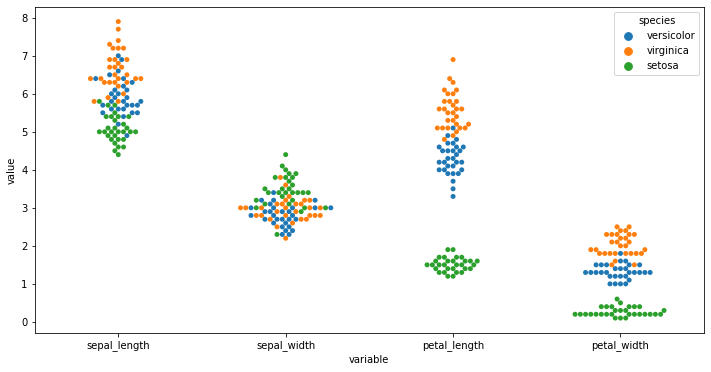

In [79]:
plt.figure(figsize=(12,6))
sns.swarmplot(data=temp, x='variable', y='value', hue='species')
plt.show()

##### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [80]:
# is the petal area significantly different in virginica compared to setosa?
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
70,5.9,3.2,4.8,1.8,versicolor,0,1,0
123,6.3,2.7,4.9,1.8,virginica,0,0,1
87,6.3,2.3,4.4,1.3,versicolor,0,1,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
15,5.7,4.4,1.5,0.4,setosa,1,0,0


In [81]:
train['petal_area'] = train.petal_length*train.petal_width
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica,petal_area
70,5.9,3.2,4.8,1.8,versicolor,0,1,0,8.64
123,6.3,2.7,4.9,1.8,virginica,0,0,1,8.82
87,6.3,2.3,4.4,1.3,versicolor,0,1,0,5.72
3,4.6,3.1,1.5,0.2,setosa,1,0,0,0.30
15,5.7,4.4,1.5,0.4,setosa,1,0,0,0.60


In [82]:
# not normal distributions, do mann-whitney test
stats.mannwhitneyu(x=train[train.species == 'virginica'].petal_area, 
                   y=train[train.species == 'setosa'].petal_area)

MannwhitneyuResult(statistic=900.0, pvalue=2.978472128053608e-11)

In [83]:
# Reject Ho, there is a significant difference in petal area between virginica and setosa species

In [84]:
train['sepal_area'] = train.sepal_length*train.sepal_width
stats.mannwhitneyu(x=train[train.species == 'virginica'].sepal_area, 
                   y=train[train.species == 'setosa'].sepal_area)

MannwhitneyuResult(statistic=625.0, pvalue=0.009874171659633455)

In [85]:
# Reject Ho, there is a significant difference in sepal area between virginica and setosa species

##### Document takeaways and any actions.

In [86]:
# There is a significant difference in both sepal and petal area between virginica and setosa species.

## Part II

In [87]:
ship = acquire.get_titanic_data()
ship = prepare.prep_titanic(ship)
ship.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,1,0,71.2833,0,0,0,0
2,2,1,3,0,0,7.9250,1,0,0,1
3,3,1,1,1,0,53.1000,0,0,0,1
4,4,0,3,0,0,8.0500,1,1,0,1


In [88]:
train, val, test = prepare.split_data(ship, 'survived')
train.shape, val.shape, test.shape

((534, 10), (178, 10), (179, 10))

#### Explore your titanic dataset more completely.

In [89]:
nums = ['fare']
cats = ['survived', 'pclass', 'sibsp', 'parch', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton']

survived
0    329
1    205
Name: survived, dtype: int64
0    61.610487
1    38.389513
Name: survived, dtype: float64


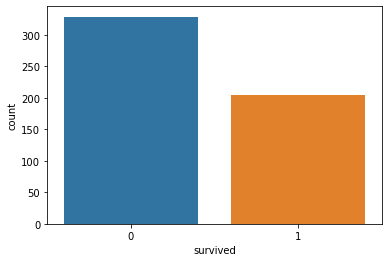

-------------
pclass
3    295
1    122
2    117
Name: pclass, dtype: int64
3    55.243446
1    22.846442
2    21.910112
Name: pclass, dtype: float64


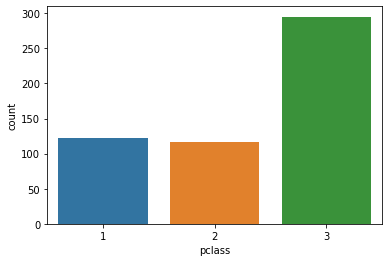

-------------
sibsp
0    378
1    106
2     22
3     10
4     10
8      5
5      3
Name: sibsp, dtype: int64
0    70.786517
1    19.850187
2     4.119850
3     1.872659
4     1.872659
8     0.936330
5     0.561798
Name: sibsp, dtype: float64


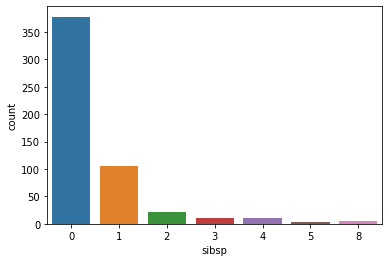

-------------
parch
0    414
1     67
2     45
3      4
5      3
4      1
Name: parch, dtype: int64
0    77.528090
1    12.546816
2     8.426966
3     0.749064
5     0.561798
4     0.187266
Name: parch, dtype: float64


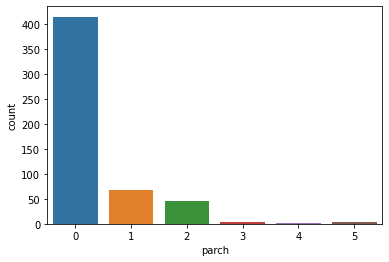

-------------
alone
1    335
0    199
Name: alone, dtype: int64
1    62.734082
0    37.265918
Name: alone, dtype: float64


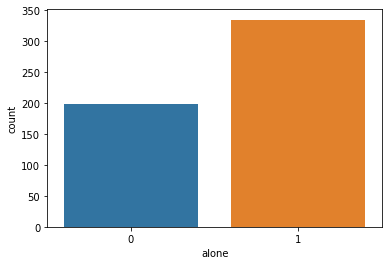

-------------
sex_male
1    348
0    186
Name: sex_male, dtype: int64
1    65.168539
0    34.831461
Name: sex_male, dtype: float64


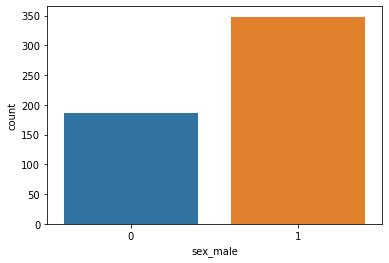

-------------
embark_town_Queenstown
0    488
1     46
Name: embark_town_Queenstown, dtype: int64
0    91.385768
1     8.614232
Name: embark_town_Queenstown, dtype: float64


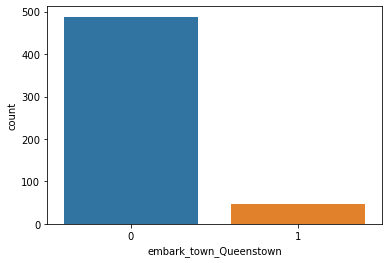

-------------
embark_town_Southampton
1    380
0    154
Name: embark_town_Southampton, dtype: int64
1    71.161049
0    28.838951
Name: embark_town_Southampton, dtype: float64


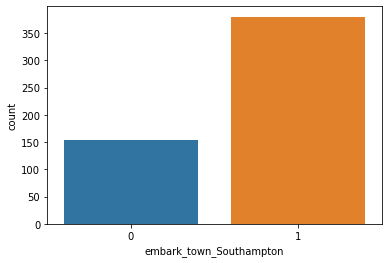

-------------


In [90]:
for col in cats:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()
    print('-------------')

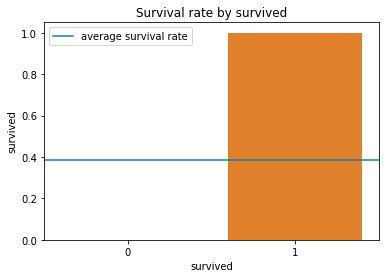

P is less than α: True
------------------------------------------------------------


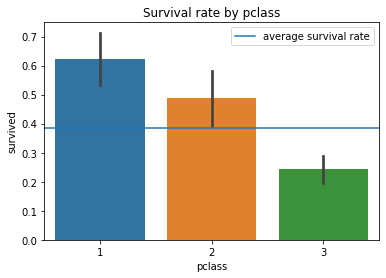

P is less than α: True
------------------------------------------------------------


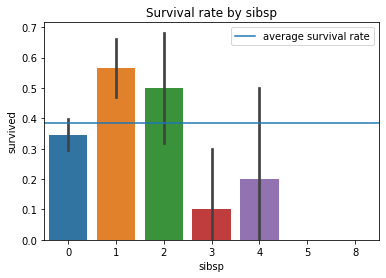

P is less than α: True
------------------------------------------------------------


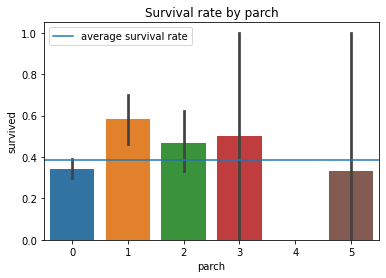

P is less than α: True
------------------------------------------------------------


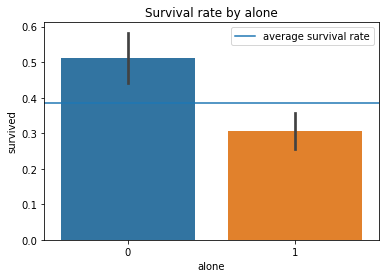

P is less than α: True
------------------------------------------------------------


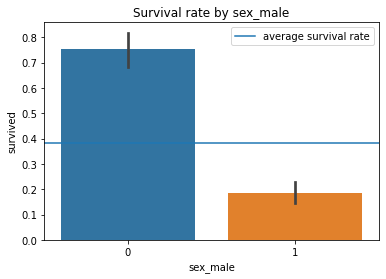

P is less than α: True
------------------------------------------------------------


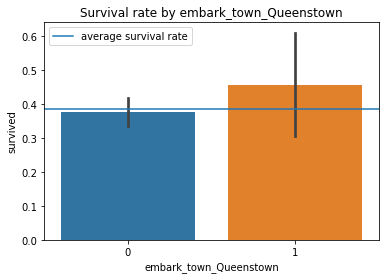

P is less than α: False
------------------------------------------------------------


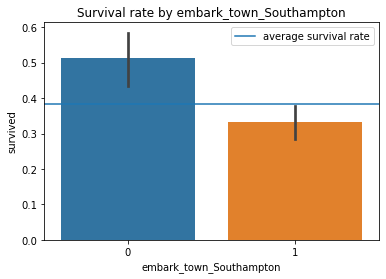

P is less than α: True
------------------------------------------------------------


In [91]:
for col in cats:
    sns.barplot(data=train, x=col, y='survived')
    rate = train.survived.mean()
    plt.axhline(rate, label='average survival rate')
    plt.legend()
    plt.title('Survival rate by '+col)
    plt.show()
    
    α = 0.05
    o = pd.crosstab(train[col], train.survived)
    chi2, p, dof, e = stats.chi2_contingency(o)
    result = p < α
    print('P is less than α: '+result.astype('str'))
    print('------------------------------------------------------------')

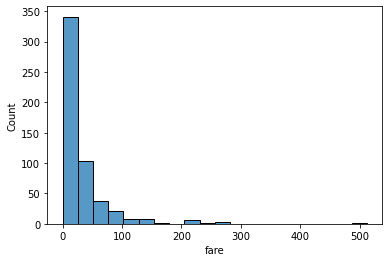

In [92]:
for col in nums:
    sns.histplot(x=col, data=train, bins=20)
    plt.show()

In [93]:
train.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1
55,55,1,1,0,0,35.5000,1,1,0,1
243,243,0,3,0,0,7.1250,1,1,0,1


In [94]:
# focus on sex, alone, class, and fare

##### Determine drivers of the target variable

In [95]:
# Drivers include being female, traveling alone, and being in a higher class  

##### Determine if certain columns should be dropped

In [96]:
# embarking columns can be dropped. They do not have a relationship with survival. Southampton has the majority of passenger and therefore a wider distribution. 

##### Determine if it would be valuable to bin some numeric columns

In [97]:
# putting fare in bins helps show distribution of prices

##### Determine if it would be valuable to combine multiple columns into one.

In [98]:
# combining sibsp and parch would be helpful if we could determine family units and traveling parties

#### Does it make sense to combine any features?

In [99]:
# analyzing some cols might determine family units if we could find a way to avoid duplicates. Roster of passenger_id might correspond with same time purchase

In [100]:
train[(train.embark_town_Southampton == 1)&(train.alone == 0)].sort_values('passenger_id')
# they do not correspond to build family units.

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,1,0,7.2500,0,1,0,1
7,7,0,3,3,1,21.0750,0,1,0,1
8,8,1,3,0,2,11.1333,0,0,0,1
13,13,0,3,1,5,31.2750,0,1,0,1
25,25,1,3,1,5,31.3875,0,0,0,1
27,27,0,1,3,2,263.0000,0,1,0,1
38,38,0,3,2,0,18.0000,0,0,0,1
40,40,0,3,1,0,9.4750,0,0,0,1
41,41,0,2,1,0,21.0000,0,0,0,1
50,50,0,3,4,1,39.6875,0,1,0,1


#### Do you find any surprises?

In [101]:
# Traveling with 1 other person lead to the highest survival rate. Any more or less lowered chances of survival.

## Part III

In [2]:
telco = acquire.get_telco_data()

In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
telco.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [5]:
telco = prepare.prep_telco(telco)
telco.head()

,customer_id,senior_citizen,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,churn_Yes,Month-to-month,One year,Two year,DSL,Fiber optic,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0002-ORFBO,0,9,1,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
1,0003-MKNFE,0,9,2,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0004-TLHLJ,0,4,1,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,13,1,0,1,1,0,1,1,...,1,1,0,0,0,1,0,0,1,0
4,0013-EXCHZ,1,3,1,0,0,0,1,1,0,...,1,1,0,0,0,1,0,0,0,1


In [6]:
train, val, test = prepare.split_data(telco, 'churn_Yes')
train.shape, val.shape, test.shape

((4225, 27), (1409, 27), (1409, 27))

#### LOOKING AT THE EXTRAS

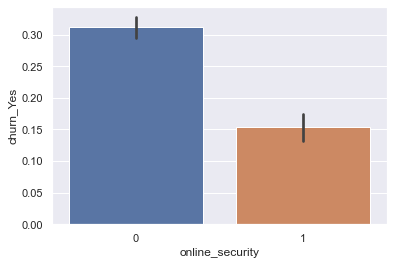

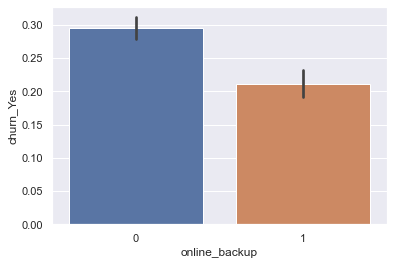

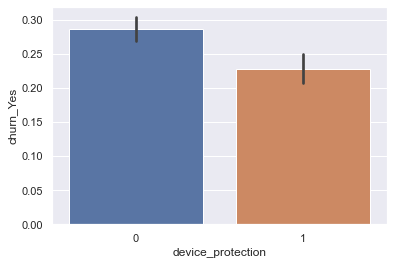

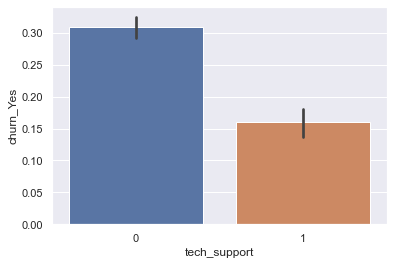

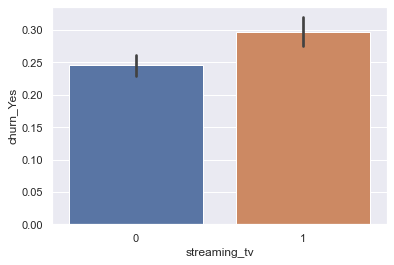

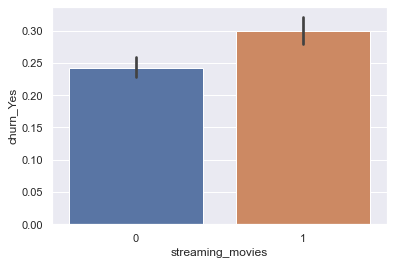

In [7]:
extras = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

for col in extras:
    sns.barplot(data=train, x=col, y='churn_Yes')
    plt.show()

Streaming tv and streaming movies churns more often than not. 

All other do not churn more often.

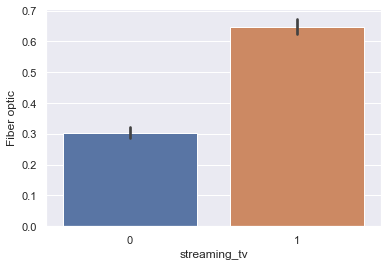

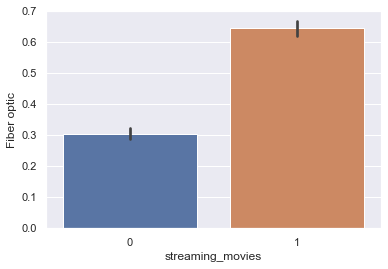

In [8]:
sns.barplot(data=train, x='streaming_tv', y='Fiber optic')
plt.show()
sns.barplot(data=train, x='streaming_movies', y='Fiber optic')
plt.show()

Streaming movies and streamning tv have near identical rates of using fiber optic, they are not always bought together as seen below:

<AxesSubplot:xlabel='streaming_movies', ylabel='streaming_tv'>

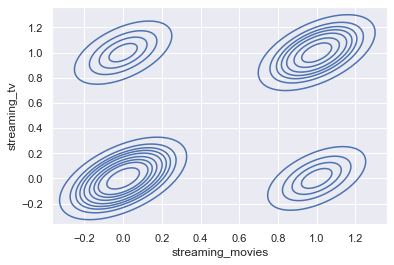

In [9]:
sns.kdeplot(data=train, x='streaming_movies', y='streaming_tv')

In [10]:
pd.crosstab(train.streaming_movies, train.streaming_tv)

streaming_tv,0,1
streaming_movies,,
0,2089,465
1,479,1192


Looking for unused accounts:
There are none

In [11]:
train[(train.DSL == 1) & (train['Fiber optic']==0) & (train.multiple_lines == 1)].shape[0]

630

In [12]:
pd.crosstab(train['Fiber optic'], train.multiple_lines, margins=True)

multiple_lines,0,1,2,All
Fiber optic,,,,
0,393,1348,629,2370
1,0,677,1178,1855
All,393,2025,1807,4225


Possible relationship with churn and multiple lines

Findings below: they all churn at near-equal rates

<AxesSubplot:xlabel='multiple_lines', ylabel='churn_Yes'>

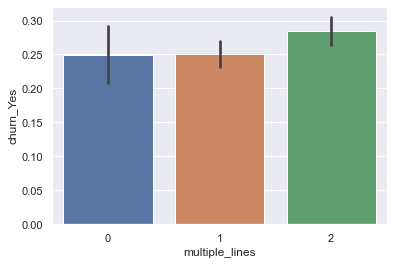

In [13]:
sns.barplot(x=train.multiple_lines, y=train.churn_Yes)

##### Explore your telco data to discover drivers of churn

In [14]:
train['extras'] = train['online_security'] + train['online_backup']+train['device_protection']+train['tech_support']+ train['streaming_tv']+train['streaming_movies']
train.head()

,customer_id,senior_citizen,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,Month-to-month,One year,Two year,DSL,Fiber optic,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,extras
5911,8319-QBEHW,0,26,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,0,2
2479,3547-LQRIK,0,47,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5889,8280-MQRQN,0,1,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,1
6087,8626-PTQGE,0,69,0,1,1,0,1,1,1,...,0,0,1,1,0,1,0,0,0,5
785,1142-IHLOO,0,51,1,0,0,0,0,1,1,...,0,1,0,0,1,0,1,0,0,2


#### INITIAL LOOK AFTER COMBINING EXTRAS

In [15]:
nums = ['monthly_charges', 'total_charges']
cats = ['extras','senior_citizen', 'multiple_lines', 'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes','paperless_billing_Yes','churn_Yes','Month-to-month','One year','Two year','DSL', 'Fiber optic', 'Bank transfer (automatic)','Credit card (automatic)','Electronic check','Mailed check']

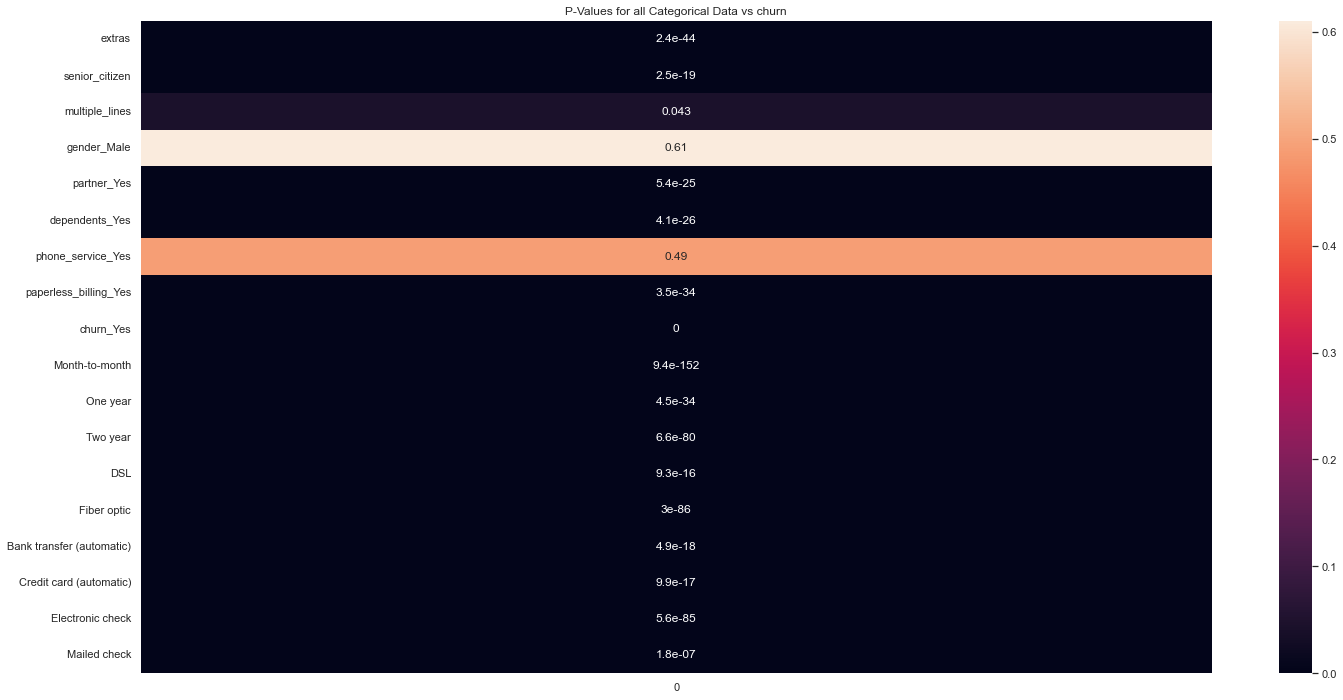

In [16]:
c = []
for col in cats:
    alpha = 0.05
    o = pd.crosstab(train['churn_Yes'], train[col])
    chi2, p, dof, e = stats.chi2_contingency(o)
    c.append(p)
c = pd.DataFrame(c)
plt.figure(figsize=(24,12))
sns.heatmap(c, yticklabels=cats, annot=True, fmt='.2g')
plt.title('P-Values for all Categorical Data vs churn')
plt.show()

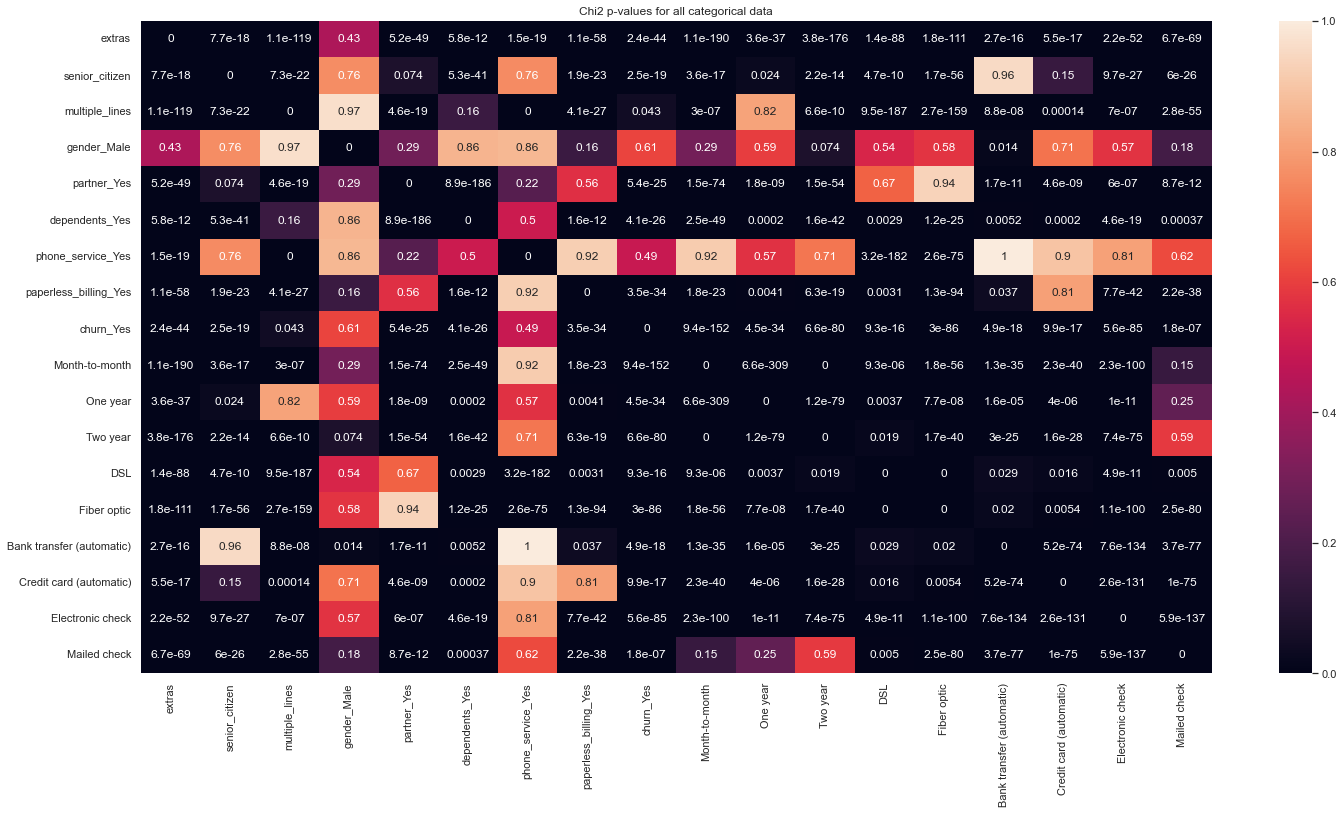

In [17]:
c = []
for col in cats:
    d = []
    for spot in cats:
        alpha = 0.05
        o = pd.crosstab(train[col], train[spot])
        chi2, p, dof, e = stats.chi2_contingency(o)
        d.append(p)
    c.append(d)
c = pd.DataFrame(c)
plt.figure(figsize=(24,12))
sns.heatmap(c, xticklabels=cats, yticklabels=cats, annot=True, fmt='.2g')
plt.title('Chi2 p-values for all categorical data')
plt.show()

extras
0    1316
3     679
2     593
1     577
4     531
5     353
6     176
Name: extras, dtype: int64
0    31.147929
3    16.071006
2    14.035503
1    13.656805
4    12.568047
5     8.355030
6     4.165680
Name: extras, dtype: float64


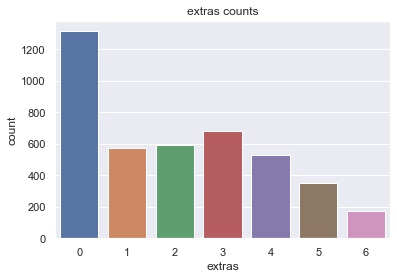

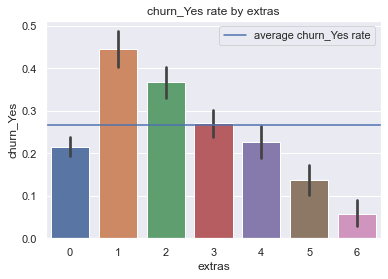

P is less than alpha: True
------------------------------------------------------------
senior_citizen
0    3541
1     684
Name: senior_citizen, dtype: int64
0    83.810651
1    16.189349
Name: senior_citizen, dtype: float64


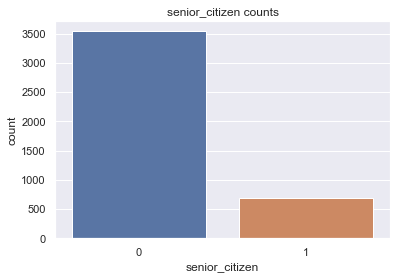

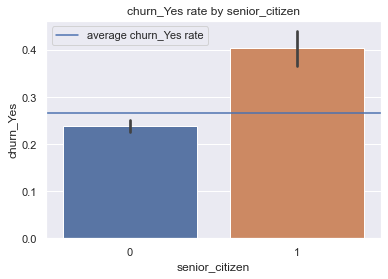

P is less than alpha: True
------------------------------------------------------------
multiple_lines
1    2025
2    1807
0     393
Name: multiple_lines, dtype: int64
1    47.928994
2    42.769231
0     9.301775
Name: multiple_lines, dtype: float64


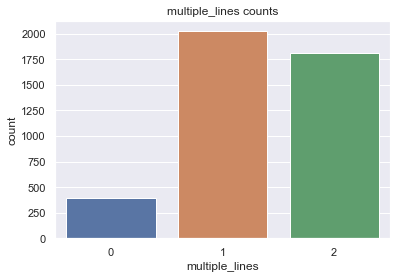

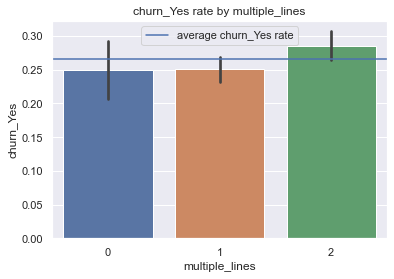

P is less than alpha: True
------------------------------------------------------------
gender_Male
1    2149
0    2076
Name: gender_Male, dtype: int64
1    50.863905
0    49.136095
Name: gender_Male, dtype: float64


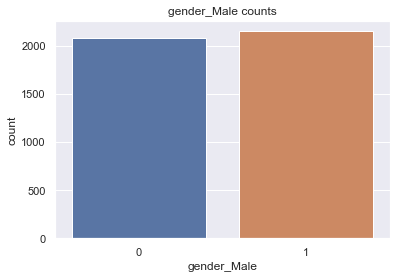

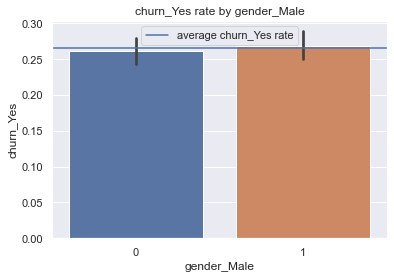

P is less than alpha: False
------------------------------------------------------------
partner_Yes
0    2161
1    2064
Name: partner_Yes, dtype: int64
0    51.147929
1    48.852071
Name: partner_Yes, dtype: float64


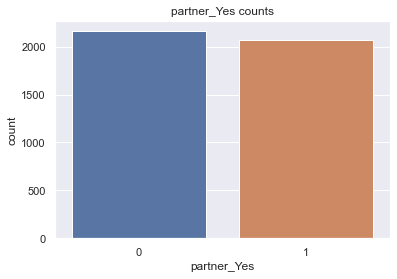

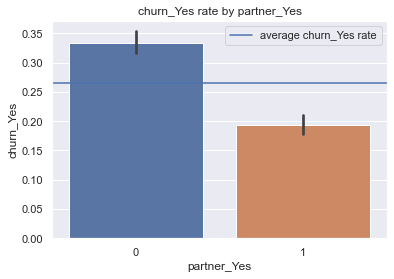

P is less than alpha: True
------------------------------------------------------------
dependents_Yes
0    2931
1    1294
Name: dependents_Yes, dtype: int64
0    69.372781
1    30.627219
Name: dependents_Yes, dtype: float64


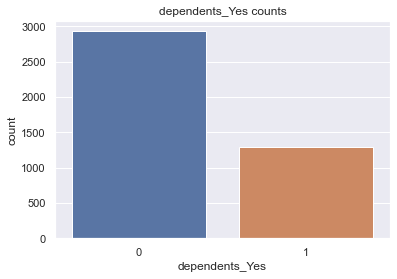

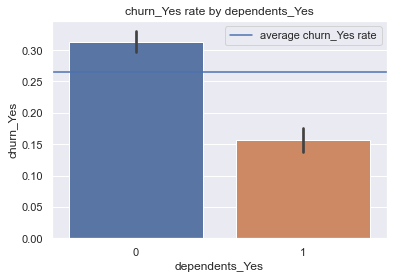

P is less than alpha: True
------------------------------------------------------------
phone_service_Yes
1    3832
0     393
Name: phone_service_Yes, dtype: int64
1    90.698225
0     9.301775
Name: phone_service_Yes, dtype: float64


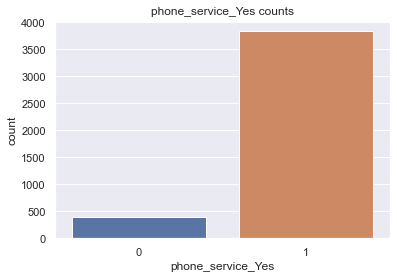

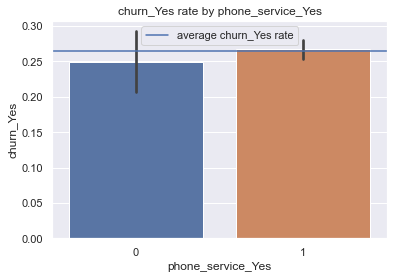

P is less than alpha: False
------------------------------------------------------------
paperless_billing_Yes
1    2509
0    1716
Name: paperless_billing_Yes, dtype: int64
1    59.384615
0    40.615385
Name: paperless_billing_Yes, dtype: float64


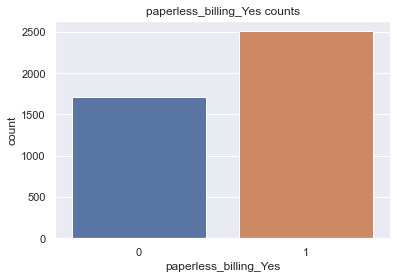

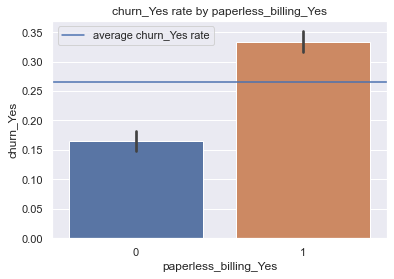

P is less than alpha: True
------------------------------------------------------------
churn_Yes
0    3104
1    1121
Name: churn_Yes, dtype: int64
0    73.467456
1    26.532544
Name: churn_Yes, dtype: float64


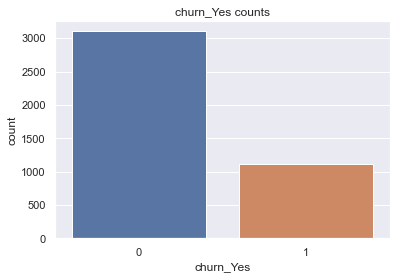

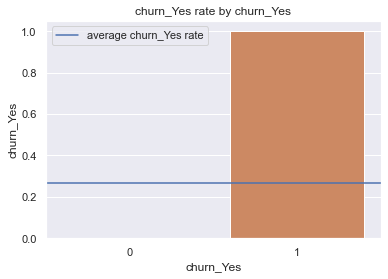

P is less than alpha: True
------------------------------------------------------------
Month-to-month
1    2317
0    1908
Name: Month-to-month, dtype: int64
1    54.840237
0    45.159763
Name: Month-to-month, dtype: float64


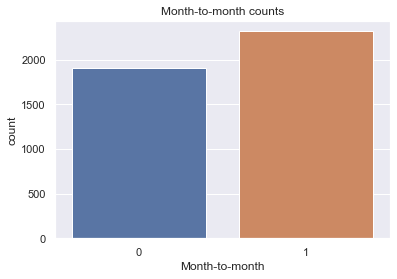

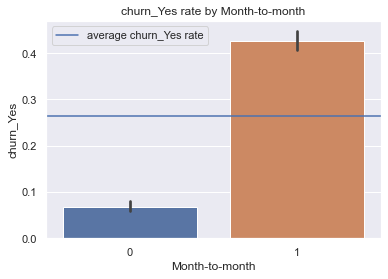

P is less than alpha: True
------------------------------------------------------------
One year
0    3312
1     913
Name: One year, dtype: int64
0    78.390533
1    21.609467
Name: One year, dtype: float64


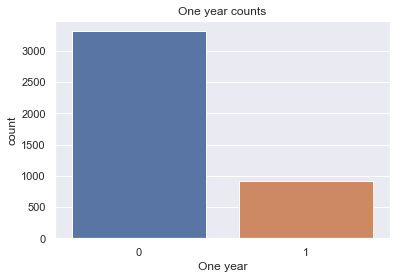

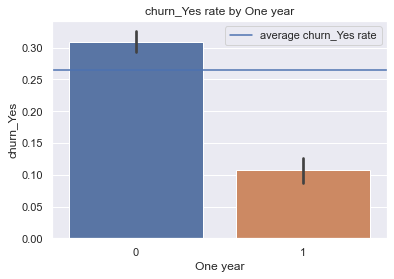

P is less than alpha: True
------------------------------------------------------------
Two year
0    3230
1     995
Name: Two year, dtype: int64
0    76.449704
1    23.550296
Name: Two year, dtype: float64


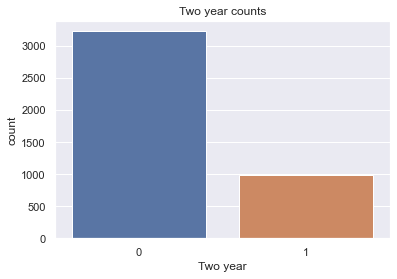

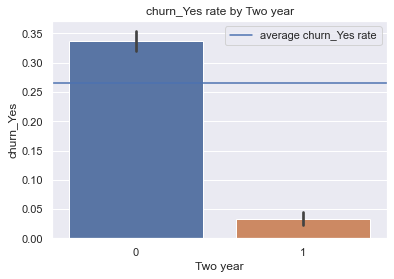

P is less than alpha: True
------------------------------------------------------------
DSL
0    2778
1    1447
Name: DSL, dtype: int64
0    65.751479
1    34.248521
Name: DSL, dtype: float64


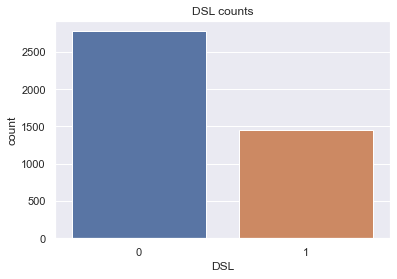

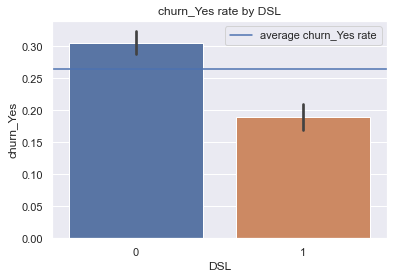

P is less than alpha: True
------------------------------------------------------------
Fiber optic
0    2370
1    1855
Name: Fiber optic, dtype: int64
0    56.094675
1    43.905325
Name: Fiber optic, dtype: float64


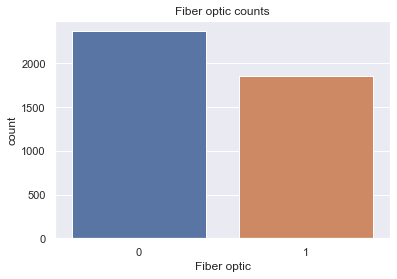

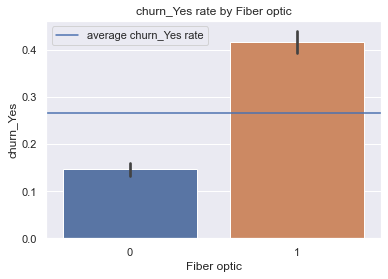

P is less than alpha: True
------------------------------------------------------------
Bank transfer (automatic)
0    3292
1     933
Name: Bank transfer (automatic), dtype: int64
0    77.91716
1    22.08284
Name: Bank transfer (automatic), dtype: float64


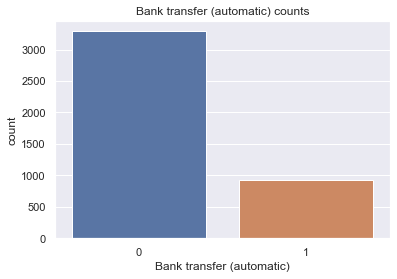

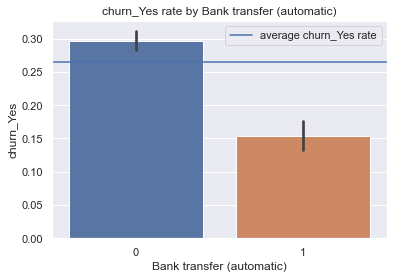

P is less than alpha: True
------------------------------------------------------------
Credit card (automatic)
0    3306
1     919
Name: Credit card (automatic), dtype: int64
0    78.248521
1    21.751479
Name: Credit card (automatic), dtype: float64


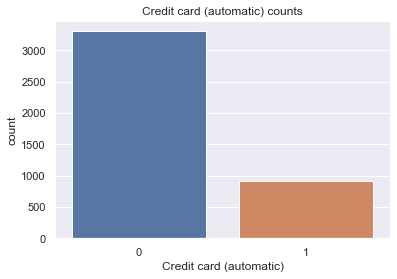

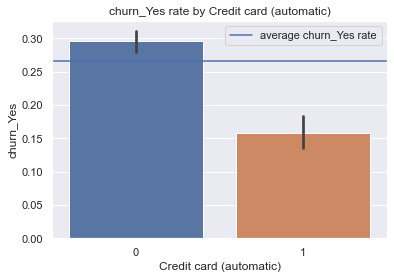

P is less than alpha: True
------------------------------------------------------------
Electronic check
0    2802
1    1423
Name: Electronic check, dtype: int64
0    66.319527
1    33.680473
Name: Electronic check, dtype: float64


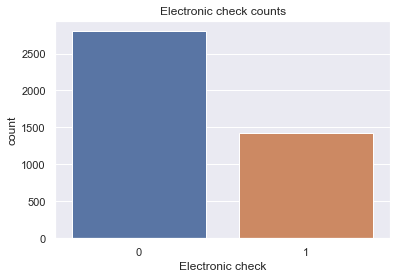

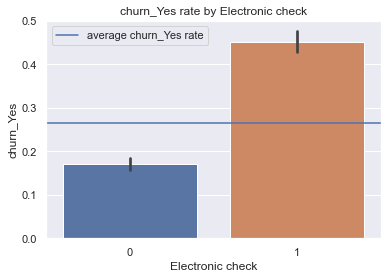

P is less than alpha: True
------------------------------------------------------------
Mailed check
0    3275
1     950
Name: Mailed check, dtype: int64
0    77.514793
1    22.485207
Name: Mailed check, dtype: float64


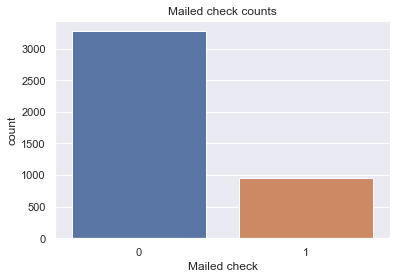

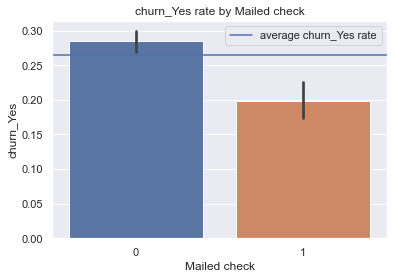

P is less than alpha: True
------------------------------------------------------------


In [18]:
explore.explore_cats(train, cats, 'churn_Yes')

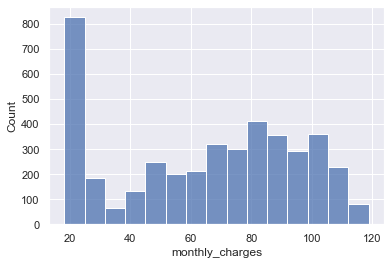

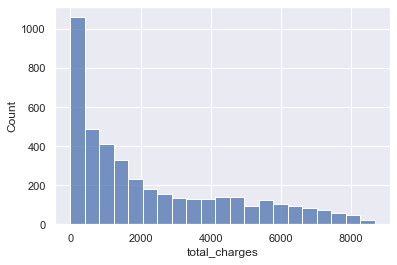

In [19]:
explore.explore_nums(train, nums)

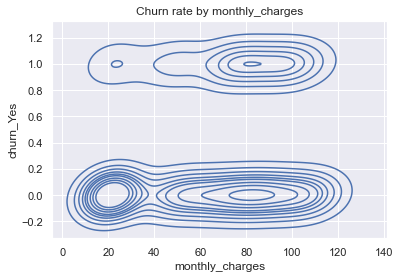

In [20]:
# looking closer at monthly charges and churn
sns.kdeplot(data=train, x='monthly_charges', y='churn_Yes')
rate = train.churn_Yes.mean()
plt.title('Churn rate by monthly_charges')
plt.show()

#### INITIAL FINDINGS/QUESTIONS:
1. There is a peak in monthly charges around $80
        Q1. Is a feature causing this cluster?
2. Having more extras, leads to less churn (logic follows they pay more per month OR there is a bundling deal)
        Q2. Does monthly cost go up with additional extras?
3. Having a single line (without dependents or partner) leads to more churn
        Q3. Look into further
4. Having paperless billing leads to almost double the churn than not having paperless billing
        Q4. Possible issue with processing
5. Having fiber optic leads to over double the churn than not having fiber optic
        Q5. What is causing more churn with fiber optic than DSL? DSL seems stable in churn rates.

##### Determine if certain columns should be dropped

A: Can drop gender and phone_service. Both do not have a relationship with churn

##### Determine if it would be valuable to combine multiple columns into one.

A: combining the extras into one column helps visualize what customers are singing up for, what is driving their bill, and what could be causing churn

##### What are your drivers of churn?

A: high bills, short contracts, single-person plans, possible issues with electronic check processing, having fiber optic, and having paperless billing

--> something around $80/month is creating the highest rate of churn -> FIBER OPTIC

#### 2. Having more extras, leads to less churn (logic follows they pay more per month OR there is a bundling deal)
        Q2. Does monthly cost go up with additional extras?
        A2. Yes, less churn possibly tied to better consumer experience.

In [21]:
train[['extras','monthly_charges']].groupby('extras').mean()

,monthly_charges
extras,
0,32.595517
1,64.976083
2,72.593086
3,80.062150
4,88.047834
5,92.999575
6,99.336080


<Figure size 1728x864 with 0 Axes>

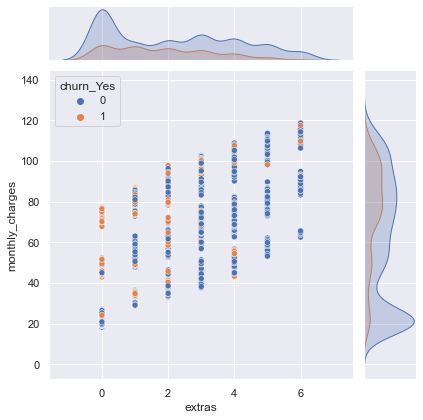

In [22]:
plt.figure(figsize=(24,12))
sns.jointplot(data=train, y='monthly_charges', x='extras', hue='churn_Yes', kind='scatter')
plt.show()

#### 1. There is a peak in monthly charges around 80
        Q1. Is a feature causing this cluster?
        A1: Fiber optic. Chart above STARTS around 70. DSL can go as low as the 20s

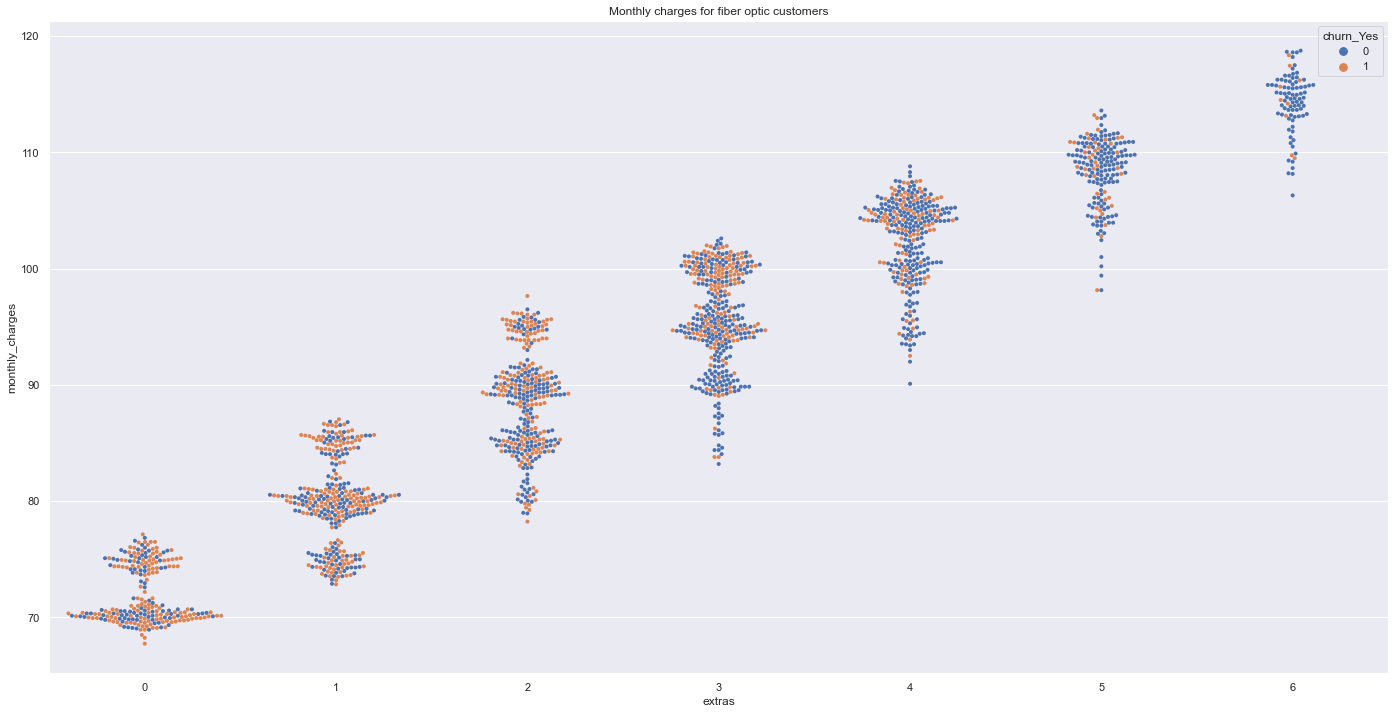

In [23]:
plt.figure(figsize=(24,12))
sns.swarmplot(data=train[train['Fiber optic'] == 1], y='monthly_charges', x='extras', hue='churn_Yes', size=4)
plt.title('Monthly charges for fiber optic customers')
plt.show()

churn vs fiber optic

In [24]:
# 18% of customers churned with fiber optic
train[(train['Fiber optic']==1)&(train.churn_Yes == 1)].shape[0]/train.shape[0]

0.1829585798816568

In [25]:
# 69% of all churn had fiber optic
train[(train['Fiber optic']==1)&(train.churn_Yes == 1)].shape[0]/train[train.churn_Yes==1].shape[0]

0.6895628902765388

#### 4. Having paperless billing leads to almost double the churn than not having paperless billing
        Q4. Specifically how much? Is there another factor tied to this causing it?
        A4. 74.7% of all customers have paperless billing
            19.8% of all customers churned with paperless billing
            25.2% of all churn had paperless billing

#### churn vs paperless billing

In [26]:
# 20% of customers churned with paperless billing
train[(train['paperless_billing_Yes']==1)&(train.churn_Yes == 1)].shape[0]/train.shape[0]

0.1983431952662722

In [27]:
# 75% of all churn had paperless billing
train[(train['paperless_billing_Yes']==1)&(train.churn_Yes == 1)].shape[0]/train[train.churn_Yes==1].shape[0]

0.7475468331846565

##### Does it make sense to combine any features?

A: combine all the extra add-on services

##### Do you find any surprises?

A: having paperless billing makes a customer twice as likely to churn

#### 5. Having fiber optic leads to over double the churn than not having fiber optic
        Q5. What is causing more churn with fiber optic than DSL? DSL seems stable in churn rates.
        A5. 43.9% of all customers have fiber optic
            18.3% of all customers churned with fiber optic
            68.9% of all churn had fiber optic

In [28]:
train[(train['Fiber optic'] == 1) & (train.churn_Yes == 1)].shape[0]/train[train.churn_Yes == 1].shape[0]

0.6895628902765388

In [29]:
train[train['Fiber optic']==1].monthly_charges.mean()

91.98231805929927

In [30]:
train[train['DSL']==1].monthly_charges.mean()

58.585763648928754

## EXPLORITORY FINDINGS

#### UPDATE ON FINDINGS:
1. There is a peak in monthly charges around 80
        Q1. Is a feature causing this cluster?
        A1: Fiber optic. Chart above STARTS around 70. DSL can go as low as the 20s
        
2. Having more extras, leads to less churn (logic follows they pay more per month OR there is a bundling deal)
        Q2. Does monthly cost go up with additional extras?
        A2. Yes, less churn possibly tied to better consumer experience.
        
3. Having a single line (without dependents or partner) leads to more churn
        Q3. Look into further
        
4. Having paperless billing leads to almost double the churn than not having paperless billing
        Q4. Specifically how much? Is there another factor tied to this causing it?
        A4. 74.7% of all customers have paperless billing
            19.8% of all customers churned with paperless billing
            25.2% of all churn had paperless billing
            
5. Having fiber optic leads to over double the churn than not having fiber optic
        Q5. What is causing more churn with fiber optic than DSL? DSL seems stable in churn rates.
        A5. 43.9% of all customers have fiber optic
            18.3% of all customers churned with fiber optic
            68.9% of all churn had fiber optic

#### MORE NUMBERS ABOUT FINDINGS
##### A. 26.5% of all customers churn (1121/4225)
-----
##### B. 69.5% of all customers have paperless billing and/or fiber optic (2935/4225)
######         33.8% have both (1429/4225)
######         35.6% of customers have one or the other (1506/4225)
-----
##### C. 86.9% of churn had paperless billing and/or fiber optic (974/1121)
######         56.8% of churn had both (637/1121)
######         30.0% of churn have one or the other (337/1121)
######         17.9% paperless billing only (201/1121)
######         12.1% fiber optic only (136/1121)
-----
##### D. If customers have both fiber optic and paperless billing, there is a 44.6% chance of the customer churning (637/1429)

In [31]:
train[train.churn_Yes == 1].shape[0]

1121

In [32]:
# 23% of customers churned with fiber optic OR paperless billing
train[((train['paperless_billing_Yes']==1)|(train['Fiber optic']==1))&(train.churn_Yes == 1)].shape[0]/train.shape[0]

0.23053254437869822

In [33]:
# 87% of all churn had paperless billing OR fiber optic
train[((train['paperless_billing_Yes']==0)&(train['Fiber optic']==1))&(train.churn_Yes == 1)].shape[0]/train[train.churn_Yes==1].shape[0]

0.12132024977698483

In [34]:
# 69% of all customers had paperless billing OR fiber optic
train[((train['paperless_billing_Yes']==1)|(train['Fiber optic']==1))].shape[0]/train.shape[0]

0.6946745562130178

In [35]:
# 26% of customers churned
train[(train.churn_Yes == 1)].shape[0]/train.shape[0]

0.26532544378698225

In [36]:
# 44.6% of customers with both will churn
train[((train['paperless_billing_Yes']==1)&(train['Fiber optic']==1))&(train.churn_Yes == 1)].shape[0]/train[((train['paperless_billing_Yes']==1)&(train['Fiber optic']==1))].shape[0]

0.4457662701189643

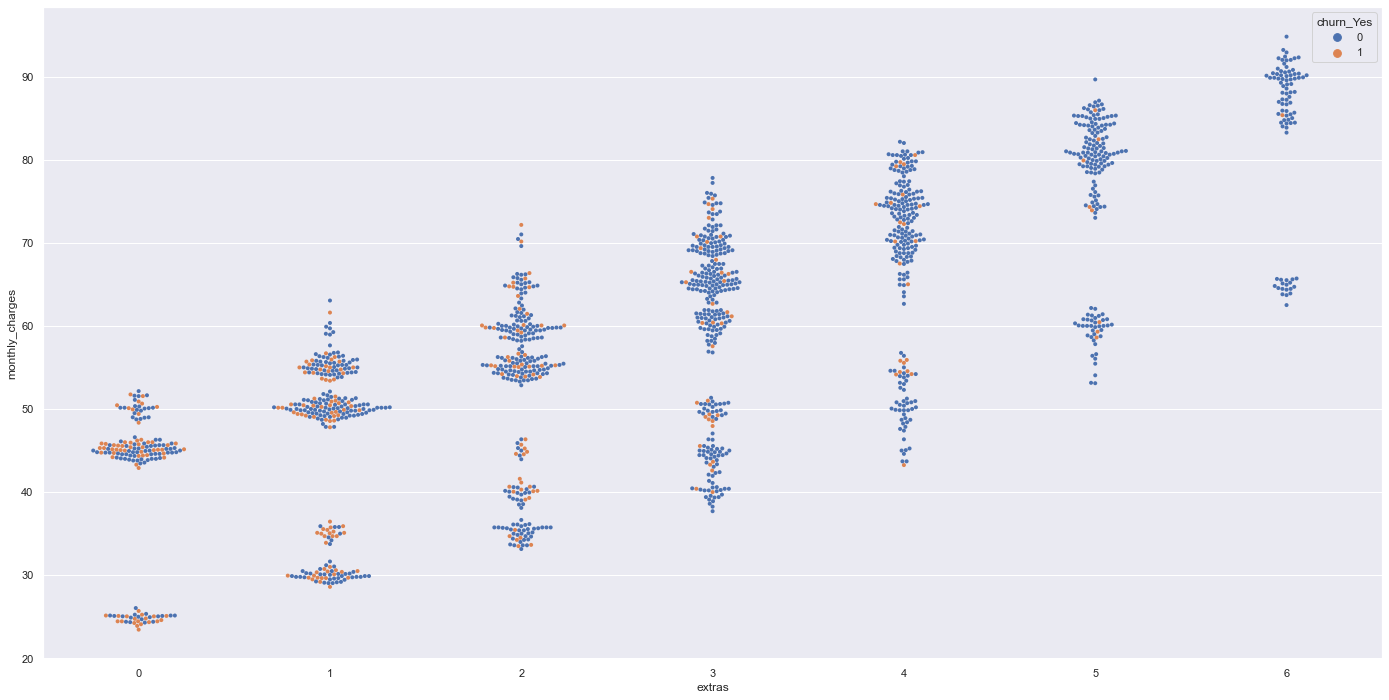

In [37]:
plt.figure(figsize=(24,12))
sns.swarmplot(data=train[train['DSL'] == 1], y='monthly_charges', x='extras', hue='churn_Yes', size=4)
plt.show()

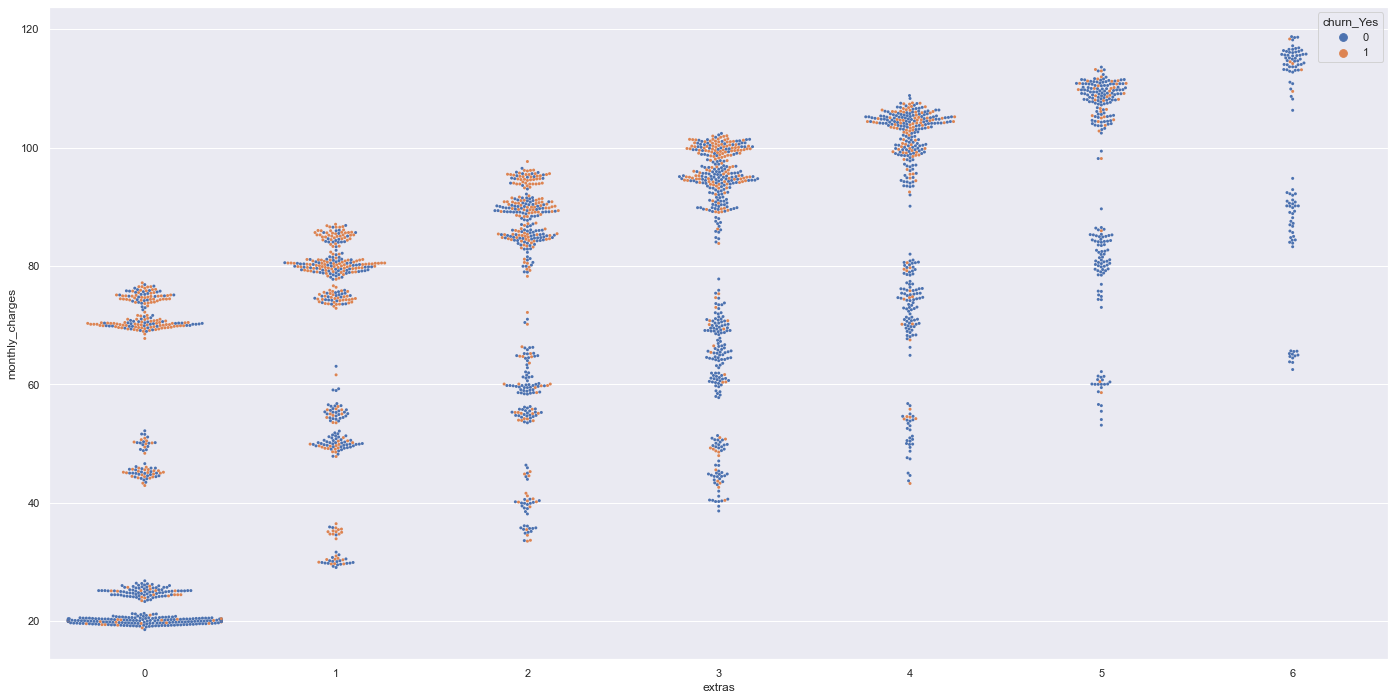

In [38]:
plt.figure(figsize=(24,12))
sns.swarmplot(data=train[train['paperless_billing_Yes'] == 1], y='monthly_charges', x='extras', hue='churn_Yes', size=3)
plt.show()

#### Lets look at tenure

<AxesSubplot:xlabel='tenure', ylabel='Count'>

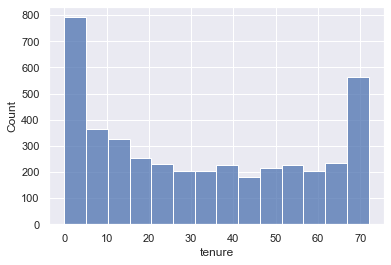

In [39]:
sns.histplot(data=train, x='tenure')

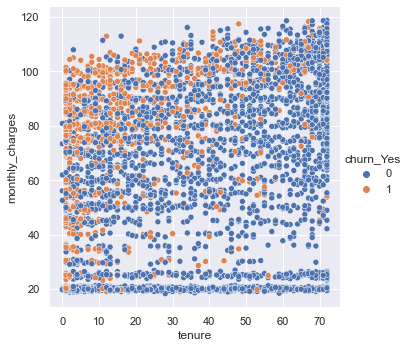

In [40]:
sns.relplot(data=train, x='tenure', y='monthly_charges', hue='churn_Yes')

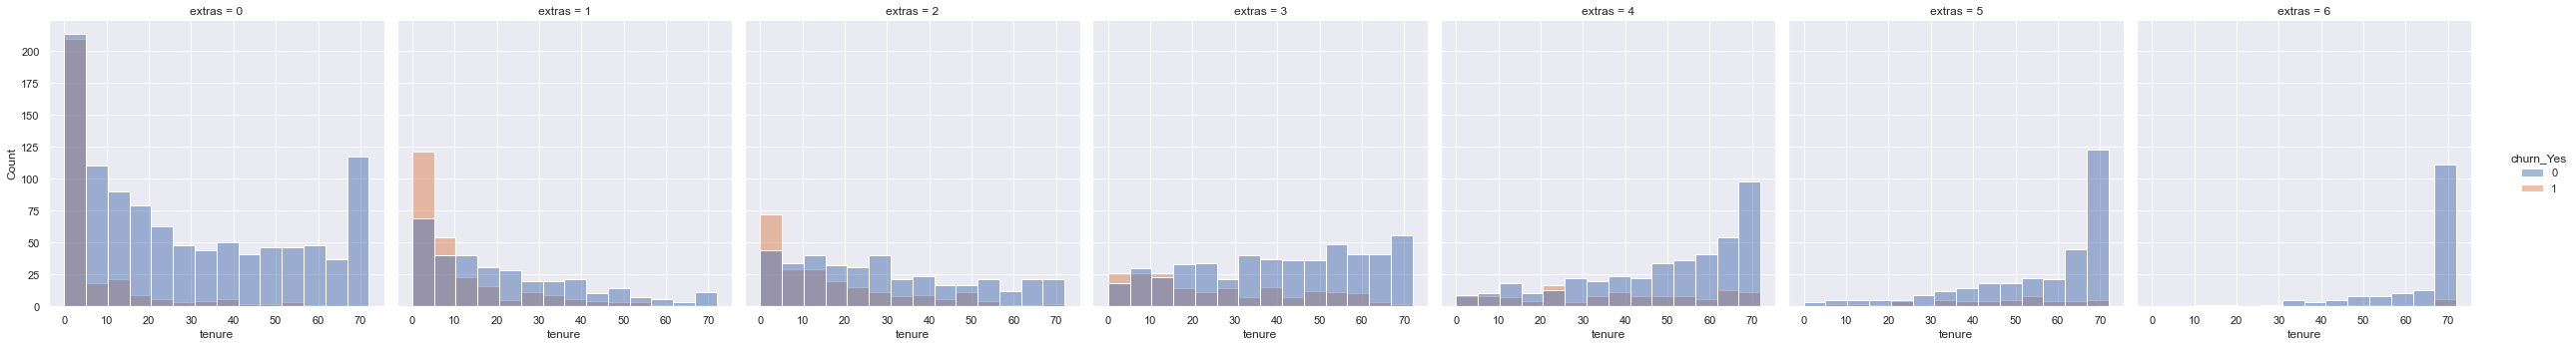

In [41]:
sns.displot(data=train, x='tenure', hue='churn_Yes', col='extras')

In [42]:
train.columns

Index(['customer_id', 'senior_citizen', 'tenure', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'monthly_charges', 'total_charges',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'paperless_billing_Yes', 'churn_Yes', 'Month-to-month', 'One year',
       'Two year', 'DSL', 'Fiber optic', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check',
       'extras'],
      dtype='object')

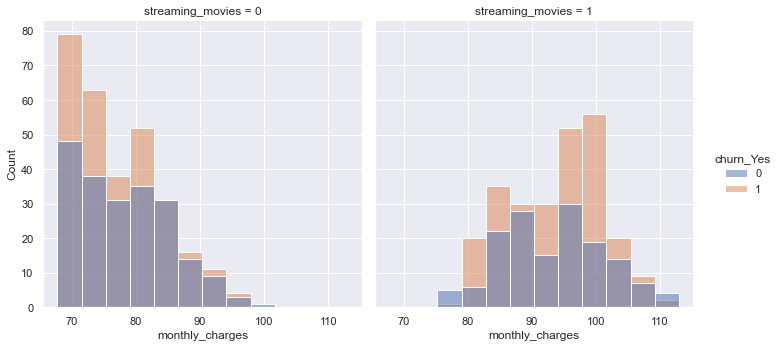

In [43]:
sns.displot(data=train[(train['Fiber optic'] == 1) & (train['tenure'] < 30)], x='monthly_charges', hue='churn_Yes', col='streaming_movies')

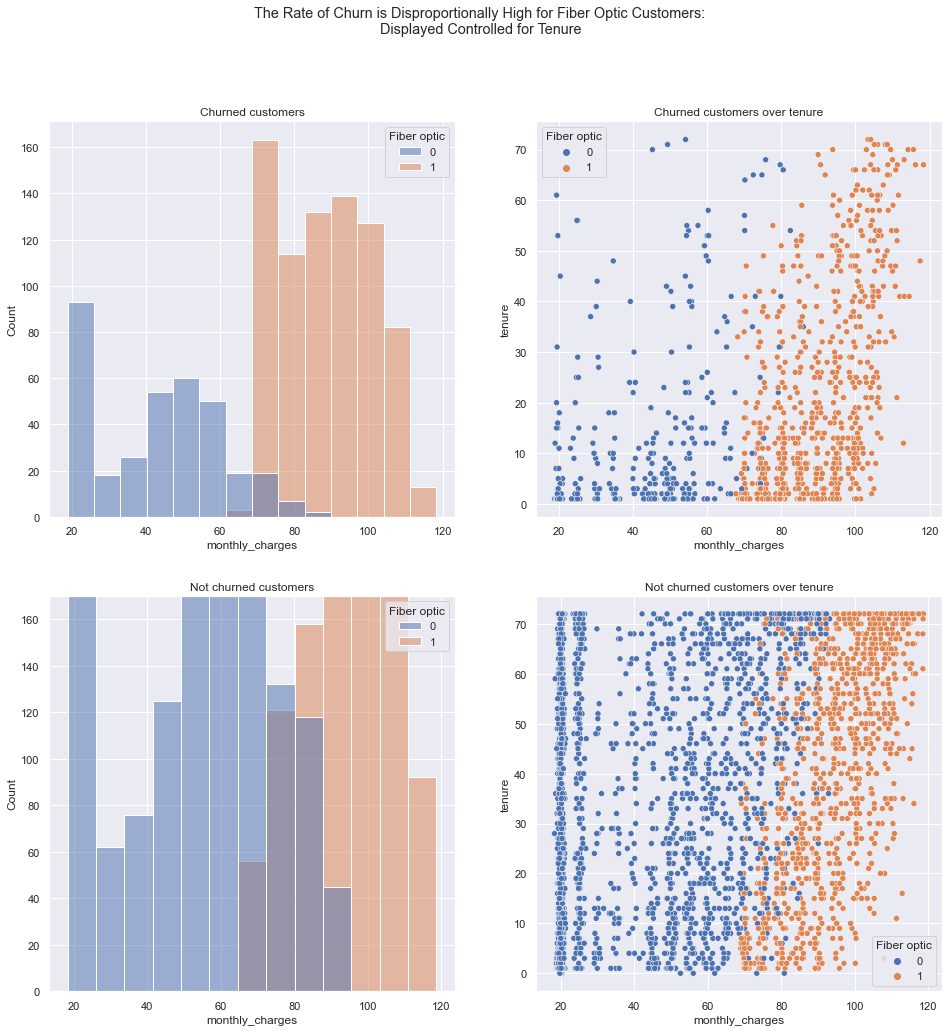

In [73]:
fig, axes = plt.subplots(2,2, figsize=(16,16))
fig.suptitle('''The Rate of Churn is Disproportionally High for Fiber Optic Customers: 
Displayed Controlled for Tenure''')

# Churning customers, no matter where in tenure, are churning the most when they have fiber optic. 
axes[0,0].set_title('Churned customers')
axes[0,1].set_title('Churned customers over tenure')
axes[1,0].set_title('Not churned customers')
axes[1,1].set_title('Not churned customers over tenure')

sns.histplot(ax=axes[0,0], data=train[train.churn_Yes == 1], x='monthly_charges', hue='Fiber optic')
sns.scatterplot(ax=axes[0,1], data=train[(train.churn_Yes == 1)], y='tenure', x='monthly_charges', hue='Fiber optic')
sns.histplot(ax=axes[1,0], data=train[train.churn_Yes == 0], x='monthly_charges', hue='Fiber optic')
axes[1,0].set_ylim(0,170)
sns.scatterplot(ax=axes[1,1], data=train[(train.churn_Yes == 0)], y='tenure', x='monthly_charges', hue='Fiber optic')
plt.show()
# would look further into when customers (get fiber optic vs their churn date) vs (non-fiber optic vs churn date)

In [75]:
train[train['churn_Yes']==1].monthly_charges

5889     50.45
5757     95.45
3465     94.60
3175    102.95
2572     30.40
         ...  
1033     20.20
6516     76.45
4364     24.10
6102     79.70
1756     70.20
Name: monthly_charges, Length: 1121, dtype: float64

In [86]:
#Ho = Mean of fiber optic customers churning is less than or equal to the than mean of non-fiber optic customers churning
#Ha = Mean of fiber optic customers churning is higher than the than mean of non-fiber optic customers churning

fiber = train[train['Fiber optic']==1].churn_Yes
no_fiber = train[train['Fiber optic']==0].churn_Yes
α = 0.05
observed = pd.crosstab(train['Fiber optic'], train.churn_Yes)


In [87]:
chi2, p, dof, expected = stats.chi2_contingency(observed)
p < α

True